#Introduction To Bootstrap

In [0]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [0]:
diabetes = datasets.load_digits()
x = diabetes.data
y = diabetes.target

In [75]:
len(x)

1797

## The two major steps to implement Bootstrap algorithm are:
###Step1: Calculate the stats

In [0]:
def get_samples(data,sample_size):
    indices = np.random.randint(0, len(data), (sample_size, len(data)))
    samples = data[indices]
    return samples

### Step2: Calculate the confidence interval

In [0]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [0]:
np.random.seed(0)   # Set the seed for reproducibility of the results

# Task 1:
Our aim is to calcuate 95% confidence interval of the target variable.
First lets calculate the mean of the target variable for each sample using the get_sample() function.

In [40]:
target_mean=[np.mean(sample) for sample in get_samples(y,1000)]
print(target_mean)

[4.494713411240957, 4.531441291040624, 4.511407902058987, 4.3995548135781855, 4.476349471341124, 4.488592097941013, 4.497495826377295, 4.445186421814134, 4.416805787423484, 4.513633834168058, 4.617696160267112, 4.469671675013912, 4.575403450194769, 4.537562604340567, 4.406789092932666, 4.466889259877574, 4.539232053422371, 4.475236505286588, 4.455203116304952, 4.484140233722871, 4.457985531441291, 4.488592097941013, 4.3550361713967725, 4.56316082359488, 4.41291040623261, 4.575959933222037, 4.532554257095159, 4.492487479131887, 4.4629938786867, 4.41513633834168, 4.410127991096272, 4.440734557595993, 4.555370061213133, 4.413466889259878, 4.413466889259878, 4.537562604340567, 4.554257095158597, 4.559821925431274, 4.558152476349472, 4.451864218141346, 4.375069560378408, 4.512520868113523, 4.658875904284919, 4.535893155258765, 4.456316082359488, 4.504173622704507, 4.3316638842515305, 4.531997774067891, 4.490261547022816, 4.471897607122982, 4.550918196994991, 4.498608792431831, 4.47189760712

target_mean is an array consisting of the means of all the samples i.e 1000 

stat_interval function will calculate the 95 percentile confidence level of the target variable. We can see that the confidence interval of the target variable ranges from 4.48 - 4.49

In [42]:
stat_intervals(target_mean,0.95)

array([4.48832777, 4.49693934])

# Task 2:
Bootstrap Model Performance
Here we will detemine the model performance using bootstrap algorithm 

In [0]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(y)

Function to resample dataframe

In [0]:
def get_samples_df(data,sample_size):
    df=data.sample(n=sample_size,replace=True,random_state=1)     
    return df


The below funtion resamples data, splits it to test and train, predicts the target variable and produces the accuracy score for each resampled data.

In [0]:
for i in range(100):
  resampled_data = get_samples_df(df,100)
  X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:10], df['target'], test_size=0.2)
  # fit model
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  # evaluate model
  predictions = model.predict(X_test)
  score = accuracy_score(y_test, predictions)
  stats.append(score)

Histogram which shows the distribution of accuracy scores.

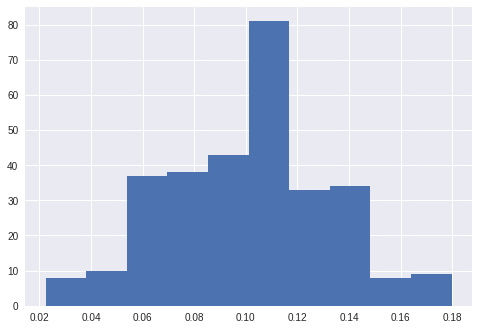

In [101]:
pyplot.hist(stats)
pyplot.show()

Confidence intervals calculation for the model accuracy.


In [102]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 3.9% and 16.9%
